Perform Sentiment Analysis in the network graph using RNN.  

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


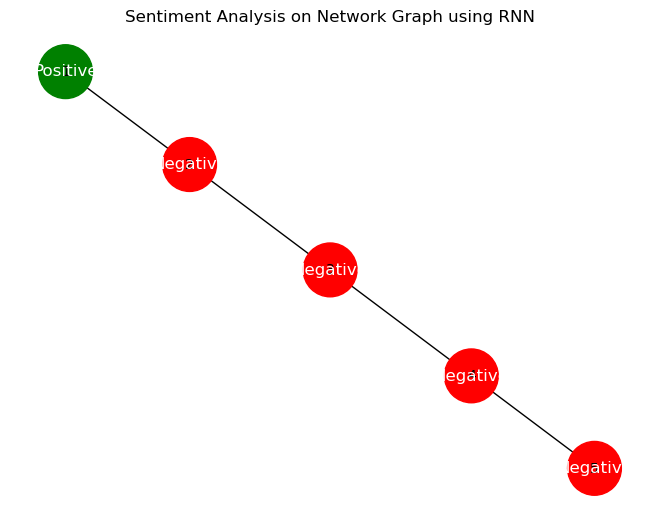

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Sample graph with text nodes
G = nx.Graph()

# Add nodes with 'text' attribute (simulate posts or tweets)
G.add_node(1, text="I love this product!")
G.add_node(2, text="This is terrible, I hate it.")
G.add_node(3, text="It is okay, not great.")
G.add_node(4, text="Absolutely fantastic experience!")
G.add_node(5, text="Worst decision ever.")
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

# Extract texts
texts = [G.nodes[n]['text'] for n in G.nodes]

# Sample sentiment labels for training (for demo purposes)
# 1 = positive, 0 = negative
labels = np.array([1, 0, 0, 1, 0])  # dummy ground-truth

# Text preprocessing
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=10)

# Define simple RNN model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=32, input_length=10))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded, labels, epochs=10, verbose=0)

# Predict sentiments
preds = model.predict(padded)
preds_label = ['Positive' if p >= 0.5 else 'Negative' for p in preds]

# Add sentiment result to node attributes
for i, node in enumerate(G.nodes):
    G.nodes[node]['sentiment'] = preds_label[i]

# Visualization
colors = ['green' if G.nodes[n]['sentiment'] == 'Positive' else 'red' for n in G.nodes]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1500, font_size=10)
node_labels = nx.get_node_attributes(G, 'sentiment')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='white')
plt.title("Sentiment Analysis on Network Graph using RNN")
plt.show()


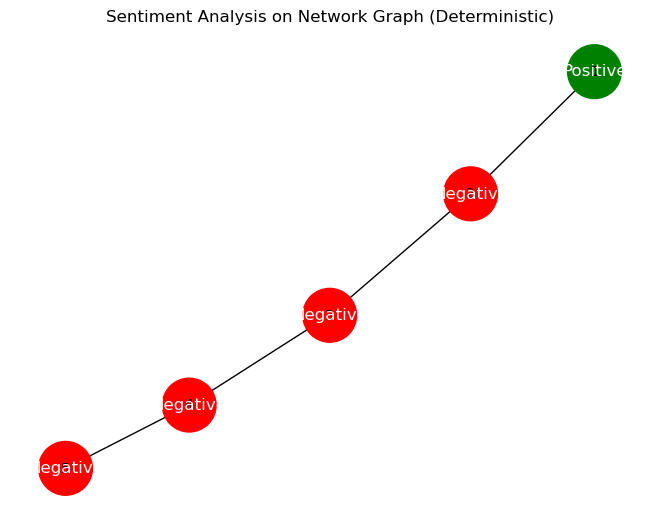

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Sample graph with text nodes
G = nx.Graph()
G.add_node(1, text="I love this product!")
G.add_node(2, text="This is terrible, I hate it.")
G.add_node(3, text="It is okay, not great.")
G.add_node(4, text="Absolutely fantastic experience!")
G.add_node(5, text="Worst decision ever.")
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

# Extract texts and labels
texts = [G.nodes[n]['text'] for n in G.nodes]
labels = np.array([1, 0, 0, 1, 0])  # 1=positive, 0=negative

# Tokenize and pad
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=10)

# Build and train model
model = Sequential([
    Embedding(1000, 32, input_length=10),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded, labels, epochs=10, verbose=0)

# Predict sentiments
preds = model.predict(padded, verbose=0)
preds_label = ['Positive' if p >= 0.5 else 'Negative' for p in preds]

# Annotate and visualize graph
for i, node in enumerate(G.nodes):
    G.nodes[node]['sentiment'] = preds_label[i]

colors = ['green' if G.nodes[n]['sentiment'] == 'Positive' else 'red' for n in G.nodes]
pos = nx.spring_layout(G, seed=seed)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1500, font_size=10)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'sentiment'), font_color='white')
plt.title("Sentiment Analysis on Network Graph (Deterministic)")
plt.show()


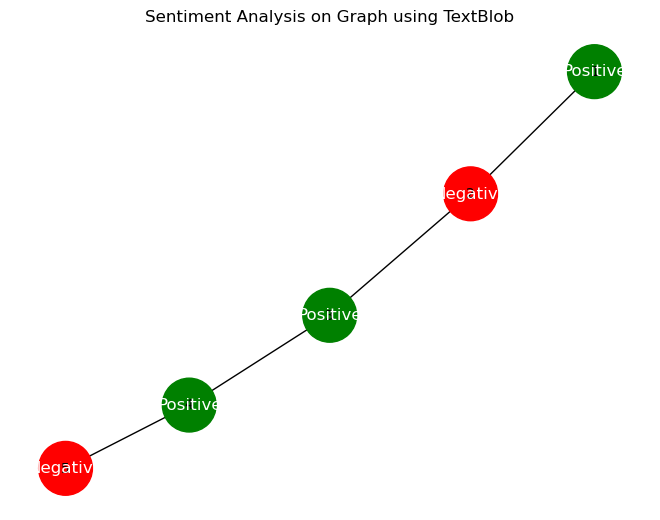

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from textblob import TextBlob

# Graph setup
G = nx.Graph()
G.add_node(1, text="I love this product!")
G.add_node(2, text="This is terrible, I hate it.")
G.add_node(3, text="It is okay, not great.")
G.add_node(4, text="Absolutely fantastic experience!")
G.add_node(5, text="Worst decision ever.")
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

# Sentiment prediction using TextBlob
for node in G.nodes:
    text = G.nodes[node]['text']
    polarity = TextBlob(text).sentiment.polarity
    G.nodes[node]['sentiment'] = 'Positive' if polarity >= 0 else 'Negative'

# Visualization
colors = ['green' if G.nodes[n]['sentiment'] == 'Positive' else 'red' for n in G.nodes]
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1500, font_size=10)
labels = nx.get_node_attributes(G, 'sentiment')
nx.draw_networkx_labels(G, pos, labels=labels, font_color='white')
plt.title("Sentiment Analysis on Graph using TextBlob")
plt.show()


In [4]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for nltk>=3.9 from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---- ----------------------------------- 71.7/624.3 kB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 235.5/624.3 kB 2.9 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/624.3 kB 3.2 MB/s eta 0:00:01
   -------------------------------------- - 604.2/624.3 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:-

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chatterbot 1.0.0 requires python-dateutil<2.8,>=2.7, but you have python-dateutil 2.9.0.post0 which is incompatible.
chatterbot 1.0.0 requires sqlalchemy<1.3,>=1.2, but you have sqlalchemy 2.0.40 which is incompatible.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


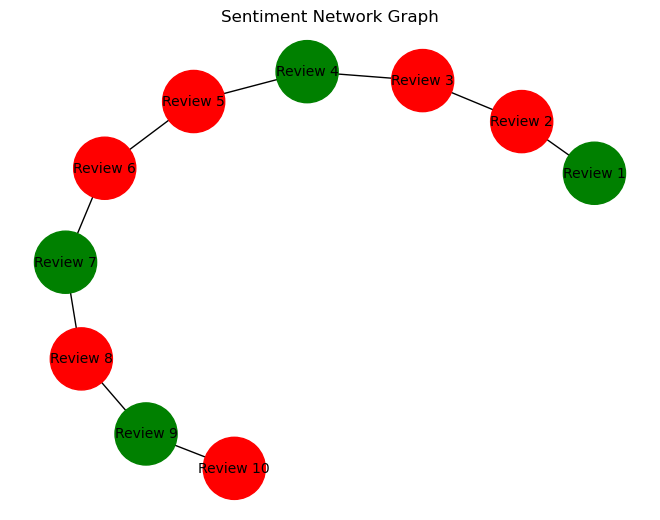

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import networkx as nx
import matplotlib.pyplot as plt

# Load IMDB dataset (only 100 samples for simplicity)
max_words = 1000
(X_train, y_train), _ = imdb.load_data(num_words=max_words)
X_train = pad_sequences(X_train, maxlen=100)
y_train = y_train[:100]
X_train = X_train[:100]

# Build RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=16, input_length=100))
model.add(SimpleRNN(16))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=5, batch_size=8, verbose=0)

# Build network graph using 10 reviews
G = nx.Graph()
for i in range(10):
    sentiment = "Positive" if model.predict(X_train[i:i+1])[0] > 0.5 else "Negative"
    G.add_node(f"Review {i+1}", sentiment=sentiment)
    if i > 0: G.add_edge(f"Review {i}", f"Review {i+1}")

# Draw graph
colors = ['green' if G.nodes[n]['sentiment'] == 'Positive' else 'red' for n in G.nodes]
nx.draw(G, with_labels=True, node_color=colors, node_size=2000, font_size=10)
plt.title("Sentiment Network Graph")
plt.show()
